In [1]:
#step 1 load the neccerary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### step-1 Data Preprocessing 

In [2]:
#step 2 load the dataset
df = pd.read_csv("medical_insurance.csv")

In [3]:
# check the few eows in dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df["bmi"].value_counts()

bmi
32.300    26
28.310    18
33.330    16
30.800    16
30.875    16
          ..
46.200     2
23.800     2
44.770     2
32.120     2
30.970     2
Name: count, Length: 548, dtype: int64

In [5]:
df["children"].value_counts()

children
0    1186
1     672
2     496
3     324
4      52
5      42
Name: count, dtype: int64

In [6]:
df.shape

(2772, 7)

In [7]:
# check the missing values in our dataset
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
#check there is dublicated rows in the dataset 
df.duplicated().sum()

1435

In [10]:
# Display duplicate rows
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.590,0,no,northwest,1639.56310
1338,23,male,34.400,0,no,southwest,1826.84300
1339,56,female,39.820,0,no,southeast,11090.71780
1340,27,male,42.130,0,yes,southeast,39611.75770
1341,19,male,24.600,1,no,southwest,1837.23700
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [11]:
# drop the duplicated rows
df = df.drop_duplicates()

In [12]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
varlist = ["smoker"]
def binary_map(x):
    return x.map({"yes":1,"no":0})

In [14]:
df[varlist] = df[varlist].apply(binary_map)

In [15]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [16]:
varlist = ["sex"]
def binary_map(x):
    return x.map({"female":1,"male":0})

In [17]:
df[varlist] = df[varlist].apply(binary_map)

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


### Question-5 Which regions have the most number of policyholders?

<Axes: xlabel='region', ylabel='count'>

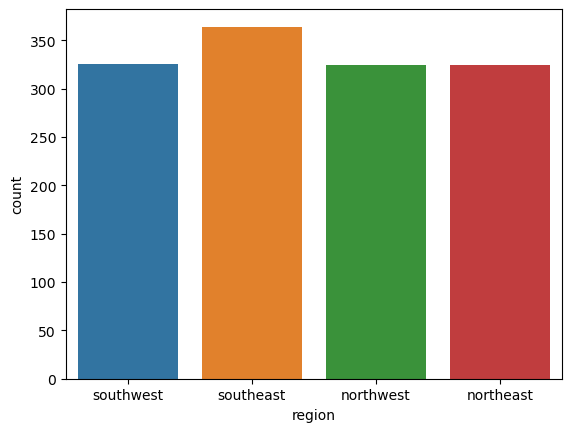

In [19]:
sns.countplot(x='region',data = df)

In [20]:
df = pd.get_dummies(df,columns = ['region'],drop_first = True)

In [21]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [22]:
# Check invalid ages
invalid_age = df[(df['age'] < 0) | (df['age'] > 120)]
print(invalid_age)

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, charges, region_northwest, region_southeast, region_southwest]
Index: []


In [23]:
# Remove or replace unrealistic ages
df = df[(df['age'] >= 0) & (df['age'] <= 120)]

In [24]:
# Check for invalid BMI values
invalid_bmi = df[(df['bmi'] < 10) | (df['bmi'] > 60)]
print(invalid_bmi)

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, charges, region_northwest, region_southeast, region_southwest]
Index: []


In [25]:
# Replace extreme BMI values with median or remove them
median_bmi = df['bmi'].median()
df.loc[df['bmi'] > 60, 'bmi'] = median_bmi
df.loc[df['bmi'] < 10, 'bmi'] = median_bmi

In [26]:
#To improve model performance and interpretability:
def bmi_category(bmi):
    if bmi<18.5:
        return "Underweight"
    if 18.5<= bmi <25:
        return "normal"
    elif 25<= bmi <30:
        return "overweight"
    else:
        return "obese"

In [27]:
df["bmi_category"] = df["bmi"].apply(bmi_category)

In [28]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27.900,0,1,16884.92400,False,False,True,overweight
1,18,0,33.770,1,0,1725.55230,False,True,False,obese
2,28,0,33.000,3,0,4449.46200,False,True,False,obese
3,33,0,22.705,0,0,21984.47061,True,False,False,normal
4,32,0,28.880,0,0,3866.85520,True,False,False,overweight


In [29]:
df['smoker_age'] = df['smoker'] * df['age']
df['smoker_bmi'] = df['smoker'] * df['bmi']

In [30]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category,smoker_age,smoker_bmi
0,19,1,27.900,0,1,16884.92400,False,False,True,overweight,19,27.9
1,18,0,33.770,1,0,1725.55230,False,True,False,obese,0,0.0
2,28,0,33.000,3,0,4449.46200,False,True,False,obese,0,0.0
3,33,0,22.705,0,0,21984.47061,True,False,False,normal,0,0.0
4,32,0,28.880,0,0,3866.85520,True,False,False,overweight,0,0.0


In [31]:
# encode the bmi_category
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['bmi_category'] = lb.fit_transform(df['bmi_category'])

### Step-2: Medical Insurance Cost Prediction  

### Exploratory Data Analysis (EDA) 

### 1. Univariate Analysis (Single Variable)

### Question-1 What is the distribution of medical insurance charges? 

C:\anoconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='charges', ylabel='Count'>

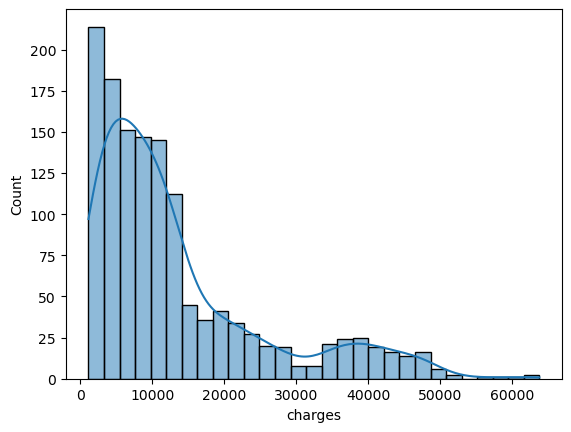

In [32]:
# we drwa a heatmap for this
sns.histplot(df['charges'],kde = True)

### Question-2  What is the age distribution of the individuals?

C:\anoconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

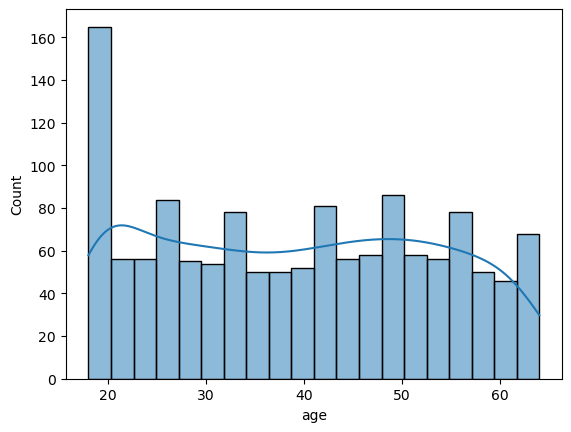

In [33]:
sns.histplot(df['age'],bins=20,kde=True)

### question-3 How many people are smokers vs non-smokers? 

<Axes: xlabel='smoker', ylabel='count'>

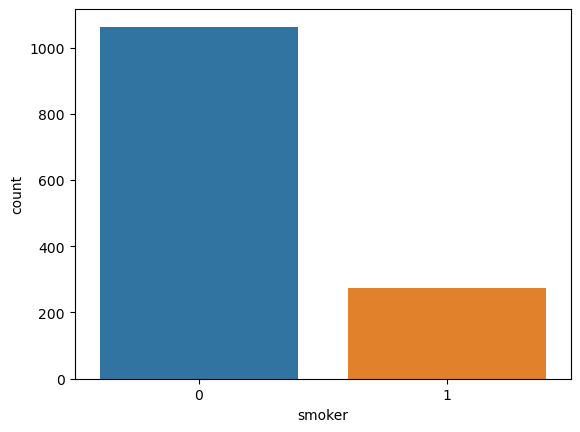

In [34]:
sns.countplot(x='smoker',data =df)

### Question-4 What is the average BMI in the dataset?

C:\anoconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bmi', ylabel='Count'>

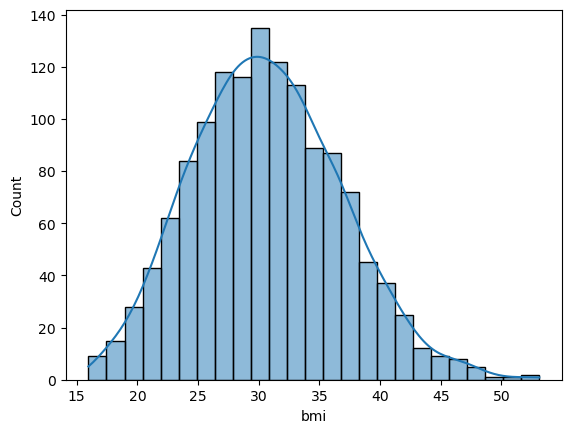

In [35]:
sns.histplot(df['bmi'],kde=True)

### 2. Bivariate Analysis (Two Variables): 

### Question-1 How do charges vary with age? 

<Axes: xlabel='age', ylabel='charges'>

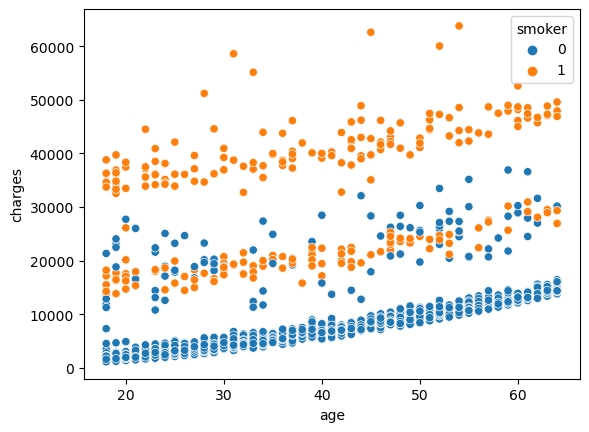

In [36]:
sns.scatterplot(x='age',y='charges',data=df,hue='smoker')

### Question-2 Is there a difference in average charges between smokers and non-smokers?

<Axes: xlabel='smoker', ylabel='charges'>

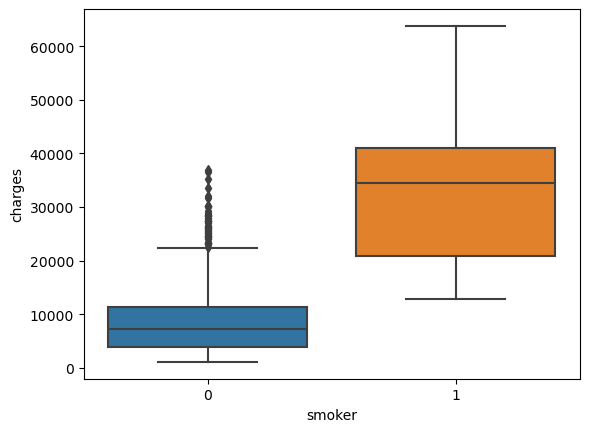

In [37]:
sns.boxplot(x='smoker',y='charges',data=df)

### Question-3 Does BMI impact insurance charges? 

<Axes: xlabel='bmi', ylabel='charges'>

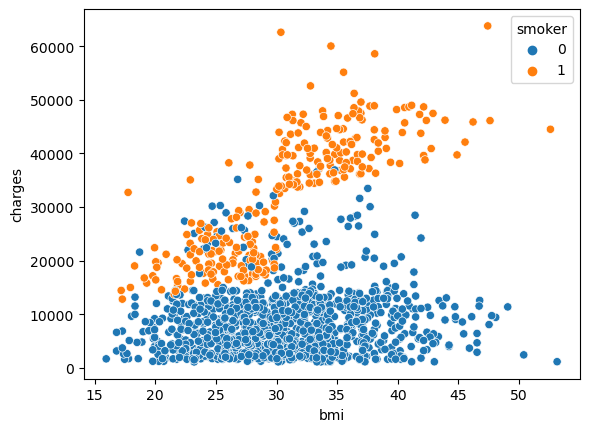

In [38]:
sns.scatterplot(x='bmi',y='charges',data=df,hue='smoker')

### question-4  Do men or women pay more on average? 

<Axes: xlabel='sex', ylabel='charges'>

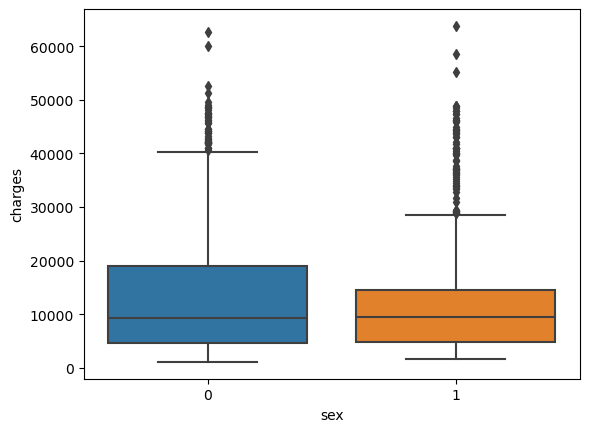

In [39]:
sns.boxplot(x='sex',y='charges',data=df)

### Question-5 Is there a correlation between the number of children and the insurance charges?

<Axes: xlabel='children', ylabel='charges'>

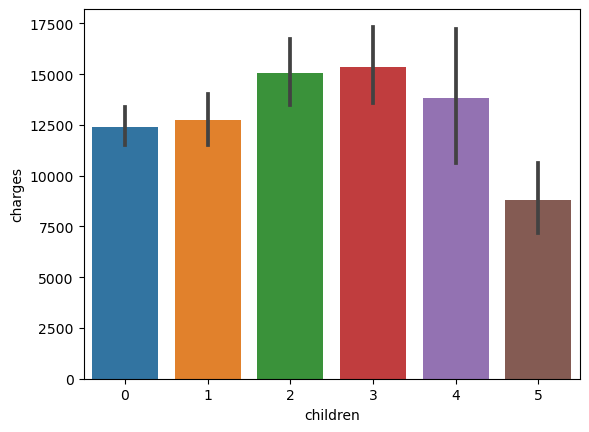

In [40]:
sns.barplot(x='children',y='charges',data=df,estimator=np.mean)

### 3. Multivariate Analysis (More than Two Variables): 

### Question-1 How does smoking status combined with age affect medical charges?

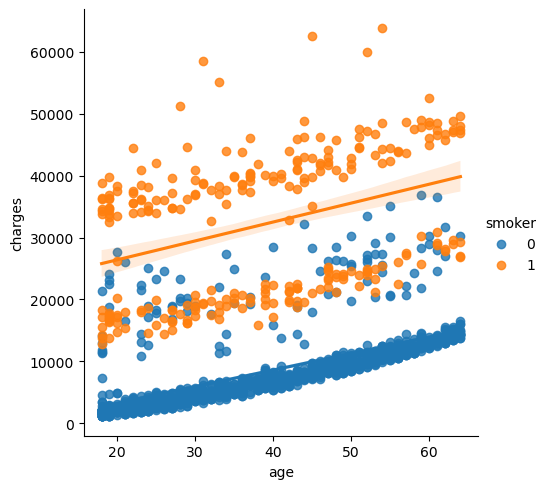

In [41]:
sns.lmplot(x='age',y='charges',hue='smoker',data=df)

### Question-2 How do age, BMI, and smoking status together affect insurance cost?

<Axes: xlabel='bmi', ylabel='charges'>

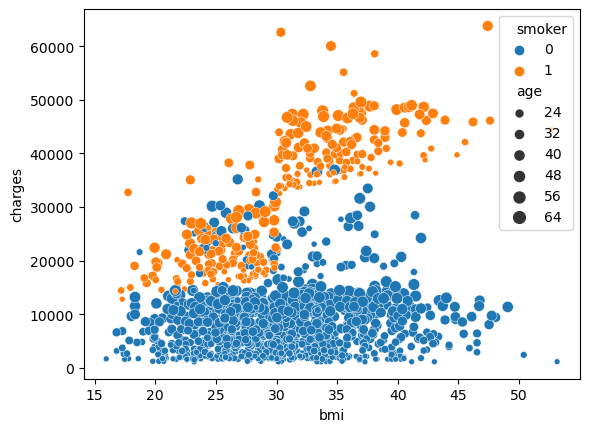

In [42]:
sns.scatterplot(x='bmi',y='charges',hue='smoker',size='age',data=df)

### Question-3 Do obese smokers (BMI > 30) pay significantly higher than non-obese 
non-smokers? 

In [43]:
df['obese'] = df['bmi']>30

In [44]:
df['obese']

0       False
1        True
2        True
3       False
4       False
        ...  
1333     True
1334     True
1335     True
1336    False
1337    False
Name: obese, Length: 1337, dtype: bool

<Axes: xlabel='smoker', ylabel='charges'>

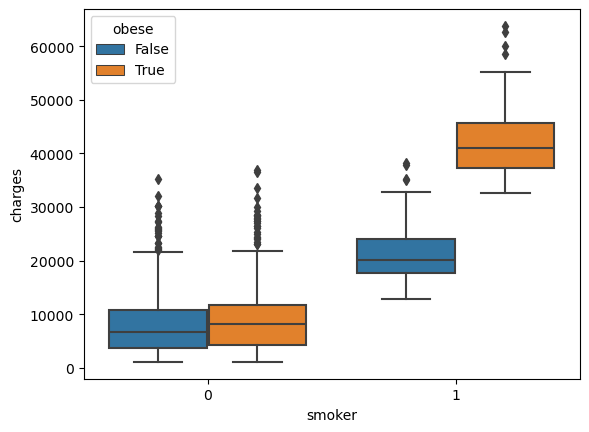

In [45]:
sns.boxplot(x='smoker',y='charges',hue='obese',data =df)

### 4. Outlier Detection: 

### Are there outliers in the charges column? Who are the individuals paying the 
highest costs? 

<Axes: xlabel='charges'>

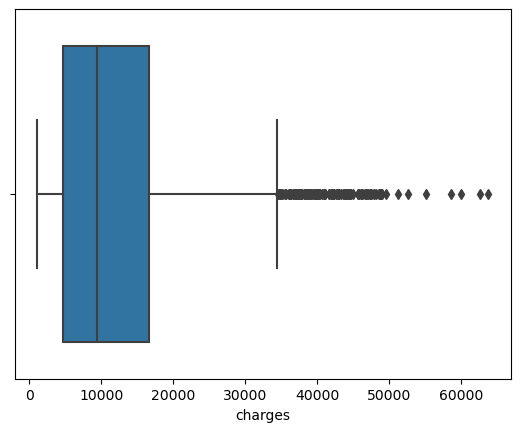

In [46]:
sns.boxplot(x='charges',data=df)

In [47]:
df.sort_values(by='charges',ascending=False).head(10)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category,smoker_age,smoker_bmi,obese
543,54,1,47.410,0,1,63770.42801,False,True,False,2,54,47.410,True
1300,45,0,30.360,0,1,62592.87309,False,True,False,2,45,30.360,True
1230,52,0,34.485,3,1,60021.39897,True,False,False,2,52,34.485,True
577,31,1,38.095,1,1,58571.07448,False,False,False,2,31,38.095,True
819,33,1,35.530,0,1,55135.40209,True,False,False,2,33,35.530,True
1146,60,0,32.800,0,1,52590.82939,False,False,True,2,60,32.800,True
34,28,0,36.400,1,1,51194.55914,False,False,True,2,28,36.400,True
1241,64,0,36.960,2,1,49577.66240,False,True,False,2,64,36.960,True
1062,59,0,41.140,1,1,48970.24760,False,True,False,2,59,41.140,True
488,44,1,38.060,0,1,48885.13561,False,True,False,2,44,38.060,True


### Are there extreme BMI values that could skew predictions? 

<Axes: xlabel='bmi'>

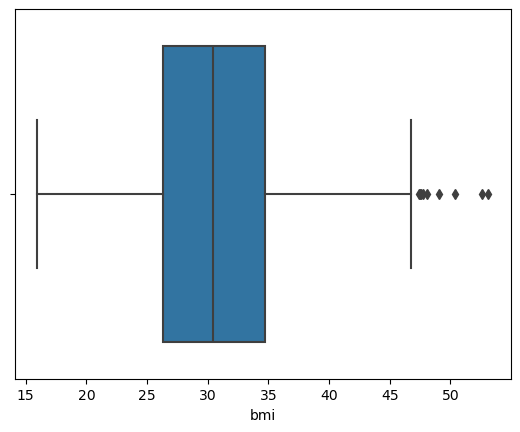

In [48]:
sns.boxplot(x=df['bmi'])

C:\anoconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bmi', ylabel='Count'>

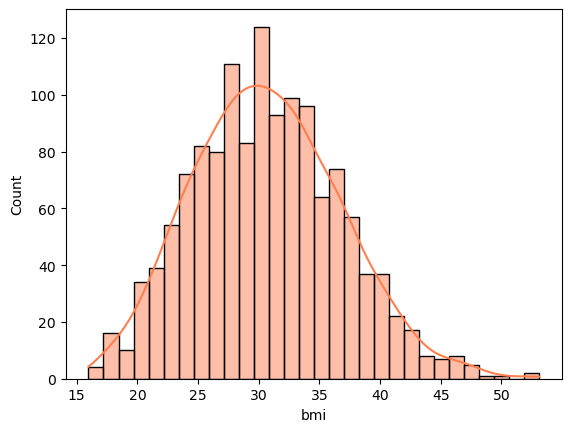

In [49]:
sns.histplot(df['bmi'], bins=30, kde=True, color='coral')

### 5. Correlation Analysis: 

### What is the correlation between numeric features like age, BMI, number of 
children, and charges?

<Axes: >

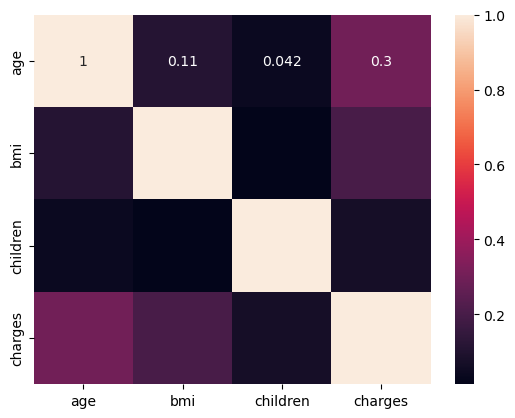

In [50]:
sns.heatmap(df[['age','bmi','children','charges']].corr(),annot=True)

### Which features have the strongest correlation with the target variable 
(charges)?

In [51]:
df.corr(numeric_only =True)['charges'].sort_values(ascending = False)

charges             1.000000
smoker_bmi          0.845134
smoker_age          0.789253
smoker              0.787234
age                 0.298308
obese               0.200501
bmi                 0.198401
region_southeast    0.073578
children            0.067389
bmi_category       -0.005352
region_northwest   -0.038695
region_southwest   -0.043637
sex                -0.058044
Name: charges, dtype: float64

### Step 3: Model Training and Evaluation

In [52]:
#Import all required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [53]:
#Define the features (X) and target (y)
x = df.drop('charges',axis=1)
y = df['charges']

In [54]:
#Split the data into training and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [55]:
#train the model
lr = LinearRegression()

In [56]:
# fit the model
lr.fit(x_train,y_train)

LinearRegression()

In [57]:
# predict the model 
y_pred = lr.predict(x_test)

In [58]:
# predict the model accuracy
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

In [59]:
rme = mean_absolute_error(y_test,y_pred)

In [60]:
r2 = r2_score(y_test,y_pred)

In [61]:
print(rmse)

4550.7755409994925


In [62]:
print(rme)

2816.5383230803614


In [63]:
print(r2)

0.887298641638693


In [64]:
models = {
    'linearregression' : LinearRegression(),
    'Ridge Regression' : Ridge(alpha=1.0),
    'Lasso Regression' : Lasso(alpha= 0.01),
    'Random Forest' : RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost' :  XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')
}

In [65]:
result ={}
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    result[name] = {'RMSE' : rmse, 'MSE' : mae, 'R2_Score': r2}


result_df = pd.DataFrame(result).T
result_df = result_df.sort_values(by='RMSE')
print(result_df)

                         RMSE          MSE  R2_Score
Ridge Regression  4544.334072  2809.452498  0.887617
Lasso Regression  4550.770468  2816.521646  0.887299
linearregression  4550.775541  2816.538323  0.887299
Random Forest     4719.185242  2678.881026  0.878803
XGBoost           5004.591175  2804.160765  0.863700


### Visualize model comparison

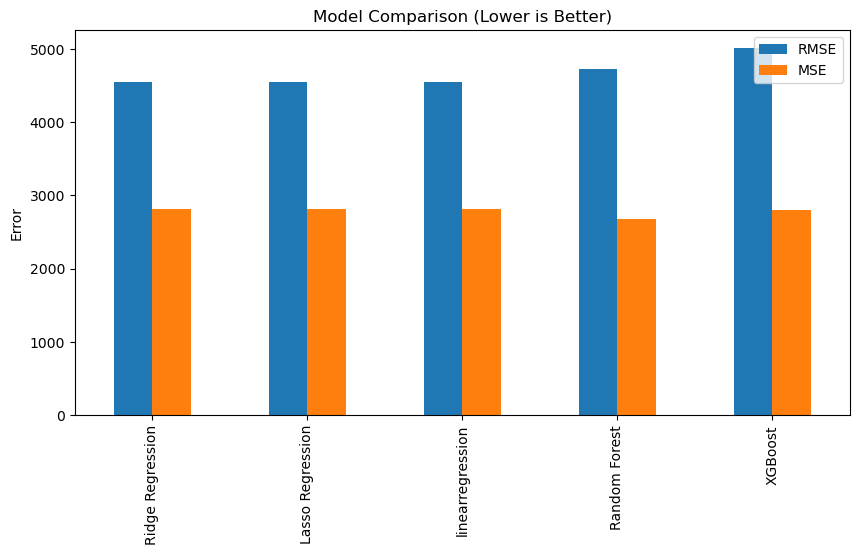

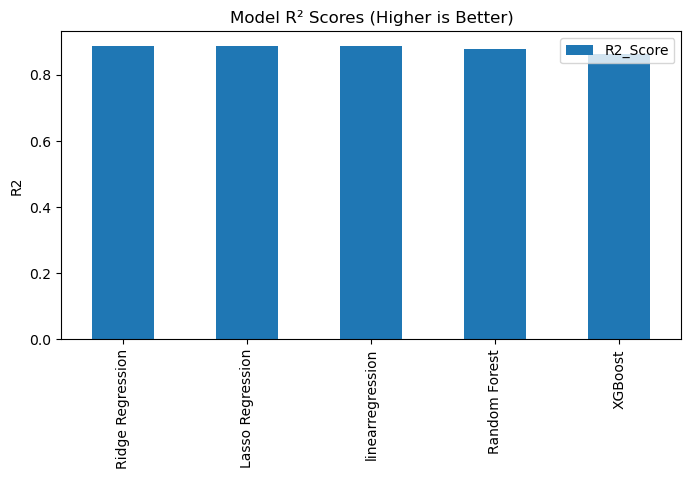

In [66]:
result_df[['RMSE',"MSE"]].plot(kind = 'bar',figsize = (10,5))
plt.title('Model Comparison (Lower is Better)')
plt.ylabel('Error')
plt.show()

result_df[['R2_Score']].plot(kind = 'bar',figsize = (8,4))
plt.title('Model R² Scores (Higher is Better)')
plt.ylabel('R2')
plt.show()

### Find the best model

In [67]:
best_model_name = result_df['RMSE'].idxmin()
print("best Model name",best_model_name)

best Model name Ridge Regression


In [68]:
import mlflow
import json,os,joblib
from mlflow.tracking import MlflowClient
print("MLflow installed successfully!")

MLflow installed successfully!


In [69]:
DATA_PATH = "medical_insurance.csv"   # update path if needed
MODEL_OUTPUT_DIR = "models"
os.makedirs(MODEL_OUTPUT_DIR, exist_ok=True)

MLFLOW_EXPERIMENT_NAME = "Insurance_Cost_Prediction"
MLFLOW_REGISTERED_NAME = "InsuranceCostModel"   # model name in model registry (change if desired)
# ----------------------------

In [70]:
import mlflow.sklearn
mlflow.set_experiment("Medical_Insurance_Cost_Prediction")
client = MlflowClient() 

best_rmse = float("inf")
best_run = None
best_model_name = None
best_model_uri = None

# 5) Loop over models, log runs
for name, estimator in models.items():
    with mlflow.start_run(run_name=name) as run:
        run_id = run.info.run_id

        # Train
        estimator.fit(x_train, y_train)
        preds = estimator.predict(x_test)

        # Metrics (y_true, y_pred)
        rmse = float(np.sqrt(mean_squared_error(y_test, preds)))
        mae = float(mean_absolute_error(y_test, preds))
        r2  = float(r2_score(y_test, preds))

        # Log parameters (a few hyperparams if available)
        try:
            params = estimator.get_params()
            # log a small subset to keep UI tidy
            for k in list(params.keys())[:10]:
                mlflow.log_param(k, str(params[k]))
        except Exception:
            pass

        # Log metrics
        mlflow.log_metric("test_rmse", rmse)
        mlflow.log_metric("test_mae", mae)
        mlflow.log_metric("test_r2", r2)

        # Log the model artifact (full sklearn estimator)
        mlflow.sklearn.log_model(estimator, artifact_path="model")

        print(f"[run_id={run_id}] {name} → RMSE={rmse:.2f}, MAE={mae:.2f}, R2={r2:.4f}")

        # Keep best by RMSE
        if rmse < best_rmse:
            best_rmse = rmse
            best_run = run_id
            best_model_name = name
            # The logged artifact URI for this run's model:
            best_model_uri = f"runs:/{run_id}/model"

# 6) Register the best model in Model Registry (if desired)
if best_model_uri is None:
    raise RuntimeError("No model was logged. Check training loop.")

print(f"\nBest run: id={best_run}, model={best_model_name}, rmse={best_rmse:.2f}")
# Create registered model if not exists (safe)
try:
    client.create_registered_model(MLFLOW_REGISTERED_NAME)
    print("Created registered model:", MLFLOW_REGISTERED_NAME)
except Exception:
    # likely already exists
    pass

# Create a new model version from the best run
mv = client.create_model_version(name=MLFLOW_REGISTERED_NAME, source=best_model_uri, run_id=best_run)
print("Registered model version:", mv.version)

# Optionally transition to Production and archive others
try:
    client.transition_model_version_stage(name=MLFLOW_REGISTERED_NAME, version=mv.version, stage="Production", archive_existing_versions=True)
    print(f"Transitioned model {MLFLOW_REGISTERED_NAME} v{mv.version} -> Production")
except Exception as e:
    print("Warning: could not transition model stage:", e)

# 7) Save best model locally for easy loading in Streamlit
# Load model back using mlflow API and save as joblib
best_model_obj = mlflow.sklearn.load_model(best_model_uri)
local_model_path = os.path.join(MODEL_OUTPUT_DIR, f"best_pipeline_{best_model_name}.joblib")
joblib.dump(best_model_obj, local_model_path)
print("Saved best model locally to:", local_model_path)

# 8) Save metrics.json to be used by Streamlit app (optional)
metrics_out = {
    "model_name": best_model_name,
    "best_run_id": best_run,
    "test_rmse": best_rmse,
    "test_mae": mae,
    "test_r2": r2
}
with open(os.path.join(MODEL_OUTPUT_DIR, "metrics.json"), "w") as f:
    json.dump(metrics_out, f, indent=2)
print("Saved metrics.json ->", os.path.join(MODEL_OUTPUT_DIR, "metrics.json"))

print("\nMLflow logging & registry steps completed.")

2025/10/28 14:47:09 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/28 14:47:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/10/28 14:47:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


[run_id=94198b71b561408fbeb3416d5bf22449] linearregression → RMSE=4550.78, MAE=2816.54, R2=0.8873


2025/10/28 14:47:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[run_id=922ba30446a04f9eaf409ccb488c3b39] Ridge Regression → RMSE=4544.33, MAE=2809.45, R2=0.8876


2025/10/28 14:47:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/28 14:47:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[run_id=95567b3175f54643bd9ef2632020ab45] Lasso Regression → RMSE=4550.77, MAE=2816.52, R2=0.8873


2025/10/28 14:47:44 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/28 14:47:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[run_id=f29a3c481201444690a49fa44a7085a9] Random Forest → RMSE=4719.19, MAE=2678.88, R2=0.8788


2025/10/28 14:47:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/28 14:48:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[run_id=49ae6b08ff3b4d5c838f435905323762] XGBoost → RMSE=5004.59, MAE=2804.16, R2=0.8637

Best run: id=922ba30446a04f9eaf409ccb488c3b39, model=Ridge Regression, rmse=4544.33
Registered model version: 2
Transitioned model InsuranceCostModel v2 -> Production


C:\Users\PRIYANKA\AppData\Local\Temp\ipykernel_21380\2424835845.py:70: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(name=MLFLOW_REGISTERED_NAME, version=mv.version, stage="Production", archive_existing_versions=True)


Saved best model locally to: models\best_pipeline_Ridge Regression.joblib
Saved metrics.json -> models\metrics.json

MLflow logging & registry steps completed.


In [71]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')
}

for name ,model in models.items():
    with mlflow.start_run(run_name=name):
         model.fit(x_train,y_train)
         y_pred = model.predict(x_test)

         # Metrics
         rmse = np.sqrt(mean_squared_error(y_test,y_pred))
         mae = mean_absolute_error(y_test,y_pred)
         r2 = r2_score(y_test,y_pred)

         # Log parameters and metrics
         mlflow.log_param("model_name",name)
         mlflow.log_metric("RMSE",rmse)
         mlflow.log_metric("MAE",mae)
         mlflow.log_metric("r2_score",r2)

         ## Log the model itself
         mlflow.sklearn.log_model(model,name)

         print(f"Logged {name}--RMSE:{rmse:.2f},R2:{r2:.4f}")

2025/10/28 14:48:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/28 14:48:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/10/28 14:48:09 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Logged Linear Regression--RMSE:4550.78,R2:0.8873


2025/10/28 14:48:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/10/28 14:48:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Logged Ridge Regression--RMSE:4544.33,R2:0.8876


2025/10/28 14:48:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged Lasso Regression--RMSE:4550.77,R2:0.8873


2025/10/28 14:48:27 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/28 14:48:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged Random Forest--RMSE:4719.19,R2:0.8788


2025/10/28 14:48:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/28 14:48:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged XGBoost--RMSE:5004.59,R2:0.8637


In [85]:
# save the model
import joblib, pprint, os
path = "models/best_pipeline_Ridge Regression.joblib"
print("exists:", os.path.exists(path))
obj = joblib.load(path)
print("Loaded object type:", type(obj))

# If it's a dict, show keys and value types
if isinstance(obj, dict):
    print("Dict keys and value types:")
    for k,v in obj.items():
        print(" -", k, ":", type(v))
    pprint.pprint(list(obj.keys()))
else:
    # Try to show if it has predict
    has_predict = hasattr(obj, "predict")
    print("Has predict attribute?:", has_predict)
    # If it's a sklearn Pipeline, show steps
    try:
        if hasattr(obj, "named_steps"):
            print("Pipeline steps:", list(obj.named_steps.keys()))
    except Exception as e:
        print("Error while inspecting pipeline:", e)

exists: True
Loaded object type: <class 'sklearn.linear_model._ridge.Ridge'>
Has predict attribute?: True


In [87]:
import joblib, pandas as pd
m = joblib.load("models/best_pipeline_Ridge Regression.joblib")
print("Loaded model type:", type(m))

sample = pd.DataFrame([{"age":40,"sex":"male","bmi":30.5,"children":2,"smoker":"yes","region":"southeast"}])

# Preprocess the sample data
sample['sex'] = sample['sex'].map({"female":1,"male":0})
sample['smoker'] = sample['smoker'].map({"yes":1,"no":0})
sample = pd.get_dummies(sample, columns=['region'], drop_first=True)

# Add engineered features to the sample data
def bmi_category(bmi):
    if bmi<18.5:
        return "Underweight"
    if 18.5<= bmi <25:
        return "normal"
    elif 25<= bmi <30:
        return "overweight"
    else:
        return "obese"

sample["bmi_category"] = sample["bmi"].apply(bmi_category)

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
sample['bmi_category'] = lb.fit_transform(sample['bmi_category'])

sample['smoker_age'] = sample['smoker'] * sample['age']
sample['smoker_bmi'] = sample['smoker'] * sample['bmi']

# Ensure columns are in the same order as the training data and handle missing columns
sample = sample.reindex(columns=x_train.columns, fill_value=0)


print("Sample prediction:", m.predict(sample))

Loaded model type: <class 'sklearn.linear_model._ridge.Ridge'>
Sample prediction: [31065.73346215]
